# start tensorboard

In [8]:
!tensorboard --logdir=./logs/train_log

# Generate data

In [64]:
!python generate_data.py

original class information: 
    classes  number
1        1  240264
0        0  299119
imbalanced class information: 
    classes  number
1        1   29911
0        0  299119
initial data information: 
    classes  number
1        1      91
0        0     910
stream data information: 
    classes  number
1        1   29820
0        0  298209
masked initial data information:    classes  number
1        1      16
0        0     185
2       -1     800
masked stream data information:    classes  number
1        1    5943
0        0   59663
2       -1  262423
save data to path: ./data/{init,eval}...


In [66]:
299199/(299119+240264)

0.5547060252177024

# keras classifier

In [54]:
!python train_embedding.py

labeled train size:166, unlabeled train size: 635, evaluate size:201

Epoch: [1 | 25] LR: 0.010000

Training |################################| (200/200) Data: 0.056s | Batch: 0.086s | Total: 0:00:17 | Loss: 1.0157 | Loss_x: 0.7626 | Loss_u: 0.7113 |  Loss_m: 0.1879
Test Stats  |################################| (1/1) Data: 0.103s | Batch: 0.107s | Total: 0:00:00 | ETA: 0:00:00 | Loss: 1.5881 | top1:  32.3383
/home/panliangxu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/panliangxu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

In [50]:
!python train_imb_embedding.py

labeled train size:172, unlabeled train size: 631, evaluate size:201
target distribution:tensor([0.5619, 0.0562, 0.1211, 0.2608], dtype=torch.float64)


Epoch: [1 | 100] LR: 0.010000

Training |                                | (5/200) Data: 0.046s | Batch: 0.167s | Total: 0:00:00 | Loss: 1.8782 | Loss_x: 1.3799 | Loss_u: 1.3686 |  Loss_m: 0.4981Traceback (most recent call last):
  File "train_imb_embedding.py", line 608, in <module>
    main(opt)
  File "train_imb_embedding.py", line 115, in main
    class_num, device, args)
  File "train_imb_embedding.py", line 239, in train_imbalance
    label_u = torch.zeros(batch_size, class_num).scatter_(1, label_u.cpu().view(-1, 1), 1)
RuntimeError: Expected index [32, 1] to be smaller than self [12, 4] apart from dimension 1 and to be smaller size than src [12, 4]


In [67]:
file='airlines'

[[ 2.000e+00  1.060e+02  1.400e+01 ...  2.020e+02  0.000e+00 -1.000e+00]
 [ 5.000e+00  1.763e+03  1.540e+02 ...  2.200e+02  0.000e+00  0.000e+00]
 [ 5.000e+00  2.717e+03  2.170e+02 ...  2.280e+02  0.000e+00  0.000e+00]
 ...
 [ 3.000e+00  4.410e+02  3.500e+01 ...  2.040e+02  1.000e+00 -1.000e+00]
 [ 8.000e+00  8.040e+02  4.500e+01 ...  7.900e+01  1.000e+00 -1.000e+00]
 [ 5.000e+00  1.414e+03  8.500e+01 ...  3.050e+02  1.000e+00 -1.000e+00]]


/home/panliangxu/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/panliangxu/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


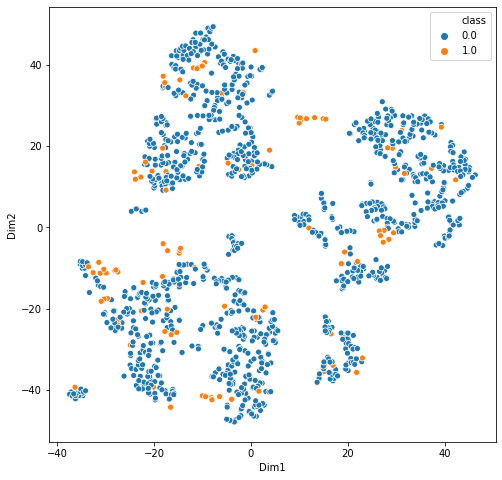

In [70]:
import numpy as np
from utils.plot import eval_plot
import matplotlib.pyplot as plt


data = np.load(f'./data/init/{file}.npy')
print(data)
eval_plot(data[:,:-2],data[:,-2])

/home/panliangxu/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/panliangxu/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


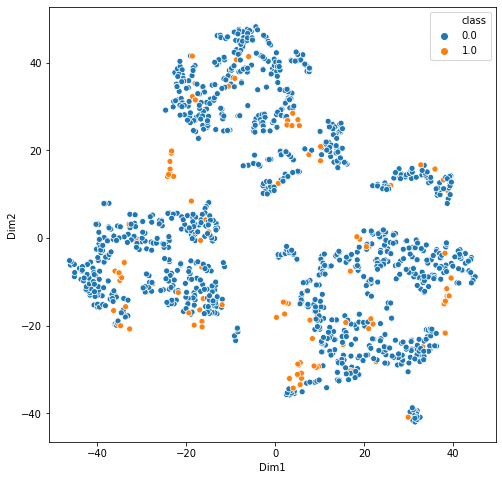

In [71]:
import numpy as np
from utils.plot import eval_plot
import matplotlib.pyplot as plt


data = np.load(f'./data/init/{file}.npy')
eval_plot(data[:,:-2],data[:,-2])

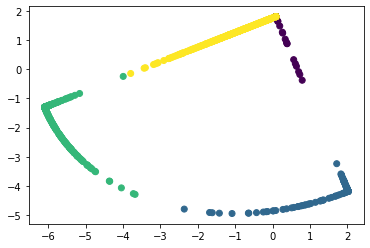

In [58]:
import matplotlib.pyplot as plt
import numpy as np

data = np.load(f'data/init/trans/{file}.npy')
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2])
plt.show()

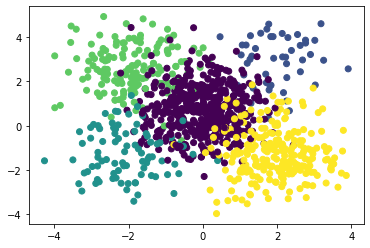

In [60]:
import matplotlib.pyplot as plt
import numpy as np

data = np.load(f'data/init/{file}.npy')
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2])
plt.show()

In [ ]:
!nvidia-smi

In [55]:
import numpy as np

data = np.load('data/init/Shuttle.npy')
print(data[:5])
print(data.shape[1]-2, len(set(data[:,-2])))

[[ 0.1584967   0.33380489  0.29847341  0.34589832  0.23615479  0.34984663
   0.33442399  0.43912071  0.41459972  1.         -1.        ]
 [ 0.17933727  0.30890515  0.35171921  0.32149081  0.19103853  0.32577141
   0.34812528  0.45291809  0.42000508  3.          3.        ]
 [ 0.17854271  0.33119321  0.32398421  0.34468695  0.26147528  0.34849547
   0.34213954  0.41794074  0.39128808  0.         -1.        ]
 [ 0.06872416  0.33145308  0.29234612  0.34495741  0.2355124   0.34934878
   0.39132344  0.43792621  0.39815816  0.         -1.        ]
 [ 0.06819914  0.32892096  0.30593709  0.34232212  0.24020525  0.34557913
   0.4015726   0.43241321  0.38860354  0.         -1.        ]]
9 7
